ref: https://yoseflab.github.io/Hotspot/CD4_Tutorial.html

In [1]:
# Parameters
working_dir = "/nfs/team205/heart/Vitro/TF_selection"
path_to_adata_gex_dir = "/nfs/team205/heart/anndata_objects/Vitro/post_multiVI_full-features"
path_to_adata_peak_tfidf = "/nfs/team205/heart/anndata_objects/Foetal/multiome_ATAC/ArchR/project_output/PeakMatrix/Foetal_Peaks_tfidf.h5ad"
group_key = "t_binned"
group_a = "t3"
group_b = "t1"
time_key = "t"
subset_object = False
geneset_list = ["MSigDB_Hallmark_2020","GO_Biological_Process_2023"]

path_to_eRegulon_signatures_gene = "/nfs/team205/heart/pyscenic/plus/eRegulon_signatures/vCM_onlyLeft_Gene_eRegulon_signatures.pkl"
path_to_eRegulon_signatures_region = "/nfs/team205/heart/pyscenic/plus/eRegulon_signatures/vCM_onlyLeft_Region_eRegulon_signatures.pkl"

path_to_DAR_compact = '/nfs/team205/heart/anndata_objects/Foetal/multiome_ATAC/ArchR/project_output/MarkerPeaks/vCM_Left_Compact-vs-Trab.csv'
path_to_DAR_trab = '/nfs/team205/heart/anndata_objects/Foetal/multiome_ATAC/ArchR/project_output/MarkerPeaks/vCM_Left_Trab-vs-Compact.csv'
path_to_eRegulon_metadata = "/nfs/team205/heart/pyscenic/plus/eRegulon_metadata/vCM_onlyLeft_eRegulon_metadata_filtered.csv" # filtered metadata

path_to_gene_signatures = '/nfs/team205/heart/Vitro/TF_selection/foetal_vCM_left_compact-vs-trabeculated_downstream/gene_signatures.pkl'

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import anndata

import matplotlib.pyplot as plt
import matplotlib as mpl
# enables correct plotting of text
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42 
import seaborn as sns

import hotspot

In [3]:
import session_info
session_info.show()

In [4]:
import importlib.util
import sys
spec = importlib.util.spec_from_file_location("module.name", "/nfs/team205/kk18/function/python/utils.py")
utils = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = utils
spec.loader.exec_module(utils)

spec = importlib.util.spec_from_file_location("module.name", "/nfs/team205/kk18/function/python/regulon_plot.py")
regulon_plot = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = regulon_plot
spec.loader.exec_module(regulon_plot)

spec = importlib.util.spec_from_file_location("module.name", "/nfs/team205/kk18/function/python/tissueaxis.py")
tissueaxis = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = tissueaxis
spec.loader.exec_module(tissueaxis)

In [5]:
sc.settings.set_figure_params(dpi=80,dpi_save=300)

In [6]:
figdir = '/nfs/team205/heart/fetal_ms_figures/raw_plots_kk'

# Function

# Read in gene signatures and define target genes

In [7]:
gene_signatures = utils.read_pkl(path_to_gene_signatures)
for k,v in gene_signatures.items():
    print(f'{k}: {len(v)} genes')

compact_specific_up: 130 genes
trab_specific_up: 107 genes
common_up: 336 genes
compact_specific_down: 185 genes
trab_specific_down: 384 genes
common_down: 738 genes


# Pathway analysis

In [8]:
import gseapy as gp

* Using three major pathways: 'MSigDB_Hallmark_2020','GO_Biological_Process_2023'

MSigDB_Hallmark_2020


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,n_genes
0,MSigDB_Hallmark_2020,Hypoxia,7/200,0.000337,0.006237,0,0,5.802224,46.388736,ERO1A;SCARB1;WSB1;NDRG1;PPFIA4;PAM;VEGFA,7
1,MSigDB_Hallmark_2020,Myogenesis,7/200,0.000337,0.006237,0,0,5.802224,46.388736,CKMT2;DES;SLC6A8;CD36;COX6A2;PPFIA4;CRYAB,7
2,MSigDB_Hallmark_2020,Estrogen Response Early,6/200,0.001982,0.018337,0,0,4.907549,30.541899,SCARB1;B4GALT1;GAB2;AFF1;DHRS3;SLC19A2,6
3,MSigDB_Hallmark_2020,Glycolysis,6/200,0.001982,0.018337,0,0,4.907549,30.541899,ERO1A;EGLN3;B4GALT1;PPFIA4;PAM;VEGFA,6


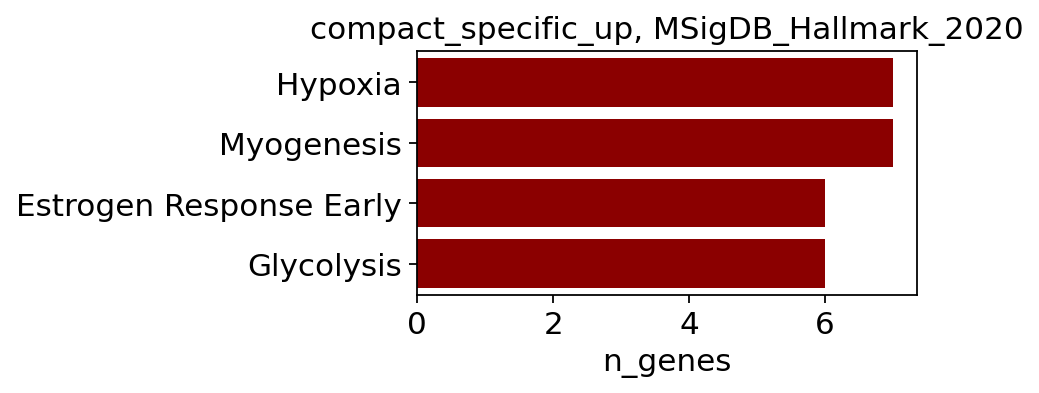

GO_Biological_Process_2023


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,n_genes
38,GO_Biological_Process_2023,Lipid Transport (GO:0006869),6/108,0.000075,0.040023,0,0,9.377609,89.101479,SCARB1;RBP7;PRELID2;OSBPL2;CD36;PITPNC1,6
37,GO_Biological_Process_2023,Organophosphate Ester Transport (GO:0015748),4/25,0.000019,0.020768,0,0,30.006047,325.585948,SCARB1;PRELID2;OSBPL2;PITPNC1,4
43,GO_Biological_Process_2023,Phospholipid Transport (GO:0015914),4/59,0.000588,0.089996,0,0,11.437229,85.075032,SCARB1;PRELID2;OSBPL2;PITPNC1,4
39,GO_Biological_Process_2023,Regulation Of Type B Pancreatic Cell Prolifera...,2/5,0.000414,0.073884,0,0,103.473958,806.046068,NR4A1;NR4A3,2
40,GO_Biological_Process_2023,Cholesterol Import (GO:0070508),2/5,0.000414,0.073884,0,0,103.473958,806.046068,SCARB1;CD36,2
41,GO_Biological_Process_2023,Positive Regulation Of Cholesterol Storage (GO...,2/5,0.000414,0.073884,0,0,103.473958,806.046068,SCARB1;SREBF2,2
42,GO_Biological_Process_2023,Venous Blood Vessel Morphogenesis (GO:0048845),2/5,0.000414,0.073884,0,0,103.473958,806.046068,TBX20;VEGFA,2


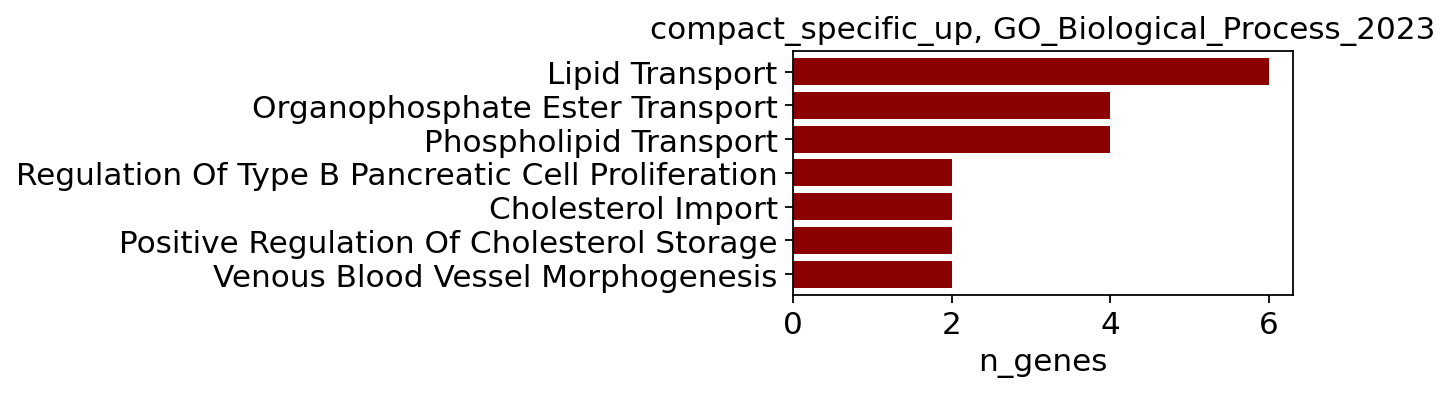

In [9]:
key = 'compact_specific_up'
adj_pval_thresh = 0.1
metrics = 'n_genes'
n_rank_plot = 10

enr = gp.enrichr(gene_list=gene_signatures[key],
                 gene_sets=geneset_list,
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )
enr.results['n_genes'] = [int(x.split('/')[0]) for x in enr.results['Overlap']]

for geneset in geneset_list:
    # select based on thresholds
    df = enr.results[enr.results['Gene_set'] == geneset]
    df = df[df['Adjusted P-value'] < adj_pval_thresh]
    if len(df)>0:
        print(geneset)
        df = df.sort_values(metrics,ascending=False)
        display(df[:30])
        
        # plot
        plt.rcParams['axes.grid'] = False
        plt.rcParams['figure.figsize'] = 4,2
        plt.barh(width=df[:n_rank_plot][metrics],
                 y=[x.split(' (')[0] for x in df[:n_rank_plot]['Term']],
                 color='darkred')
        plt.gca().invert_yaxis()
        plt.xlabel(metrics)
        plt.title(f'{key}, {geneset}')
        plt.margins(y=0.03)
        plt.savefig(f'{figdir}/Pathway-enr_vCM-left_{key}_{geneset}.pdf', bbox_inches="tight",dpi=300)
        plt.show()

MSigDB_Hallmark_2020


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,n_genes
0,MSigDB_Hallmark_2020,Myogenesis,8/200,0.000012,0.000231,0,0,8.291667,93.84269,ACTA1;DTNA;SGCD;MB;CDH13;NAV2;MYOM2;SGCG,8


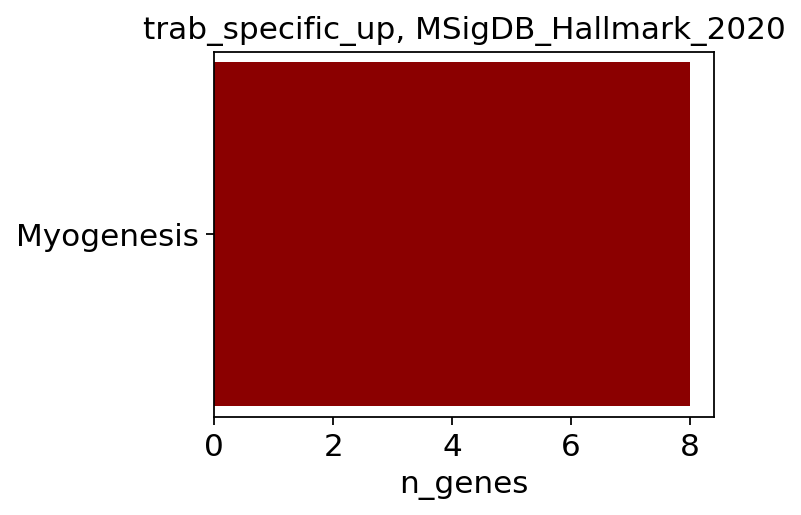

In [10]:
key = 'trab_specific_up'
adj_pval_thresh = 0.1
metrics = 'n_genes'
n_rank_plot = 10

enr = gp.enrichr(gene_list=gene_signatures[key],
                 gene_sets=geneset_list,
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )
enr.results['n_genes'] = [int(x.split('/')[0]) for x in enr.results['Overlap']]

for geneset in geneset_list:
    # select based on thresholds
    df = enr.results[enr.results['Gene_set'] == geneset]
    df = df[df['Adjusted P-value'] < adj_pval_thresh]
    if len(df)>0:
        print(geneset)
        df = df.sort_values(metrics,ascending=False)
        display(df[:30])
        
        # plot
        plt.rcParams['axes.grid'] = False
        plt.rcParams['figure.figsize'] = 4,3
        plt.barh(width=df[:n_rank_plot][metrics],
                 y=[x.split(' (')[0] for x in df[:n_rank_plot]['Term']],
                 color='darkred')
        plt.gca().invert_yaxis()
        plt.xlabel(metrics)
        plt.title(f'{key}, {geneset}')
        plt.margins(y=0.03)
        plt.savefig(f'{figdir}/Pathway-enr_vCM-left_{key}_{geneset}.pdf', bbox_inches="tight",dpi=300)
        plt.show()

MSigDB_Hallmark_2020


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,n_genes
1,MSigDB_Hallmark_2020,Myogenesis,15/200,1.558227e-06,0.000031,0,0,4.920182,65.792483,MEF2A;MYBPC3;MYOM1;SVIL;LAMA2;PDE4DIP;LDB3;SOR...,15
0,MSigDB_Hallmark_2020,UV Response Dn,14/144,1.500811e-07,0.000006,0,0,6.533110,102.648816,NRP1;WDR37;CELF2;COL11A1;NR3C1;KALRN;IGF1R;INP...,14
2,MSigDB_Hallmark_2020,Hypoxia,13/200,3.561255e-05,0.000475,0,0,4.192000,42.937872,BNIP3L;KDM3A;ZNF292;RORA;AK4;KLHL24;NR3C1;GYS1...,13
3,MSigDB_Hallmark_2020,Estrogen Response Early,11/200,5.924531e-04,0.005925,0,0,3.487586,25.917088,NCOR2;SVIL;GJA1;ABLIM1;ADCY9;DLC1;ITPK1;JAK2;R...,11
4,MSigDB_Hallmark_2020,Mitotic Spindle,10/199,2.041276e-03,0.016330,0,0,3.160808,19.578612,ARFGEF1;ABR;AKAP13;NIN;DST;ALS2;MYO9B;ACTN4;SY...,10


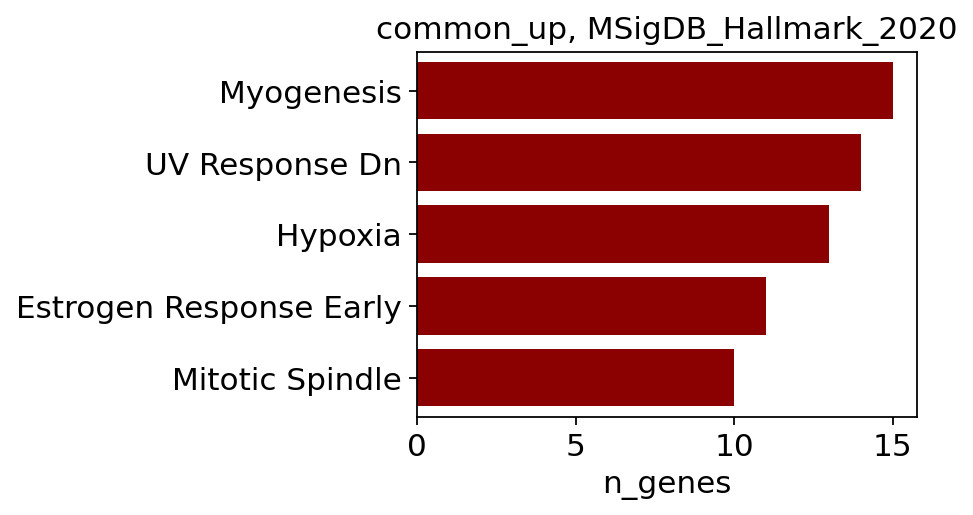

GO_Biological_Process_2023


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,n_genes
86,GO_Biological_Process_2023,Positive Regulation Of Developmental Process (...,11/233,2.034401e-03,0.077567,0,0,2.964130,18.370358,GJA1;NLGN1;BICRAL;INSR;ZBTB16;DPF3;CTNNB1;SPIR...,11
44,GO_Biological_Process_2023,Response To Calcium Ion (GO:0051592),11/106,1.714695e-06,0.000615,0,0,6.971951,92.561548,MEF2A;RYR2;CLIC4;NLGN1;PRKAA2;CPNE5;KCNMB2;CAS...,11
45,GO_Biological_Process_2023,Regulation Of Heart Contraction (GO:0008016),9/69,2.237702e-06,0.000668,0,0,8.992661,116.995062,MEF2A;RYR2;TMEM65;CELF2;KCNQ1;ATP2A2;TNNI3K;CA...,9
40,GO_Biological_Process_2023,Heart Contraction (GO:0060047),8/41,3.441432e-07,0.000466,0,0,14.509239,215.929509,MYBPC3;RYR2;KCNQ1;CASQ2;DMD;SCN5A;TTN;TRDN,8
41,GO_Biological_Process_2023,Cardiac Conduction (GO:0061337),8/46,8.736078e-07,0.000466,0,0,12.596919,175.735013,MEF2A;CACNB2;KCNQ1;AKAP9;CTNNA3;CACNA1C;SCN5A;...,8
46,GO_Biological_Process_2023,Striated Muscle Contraction (GO:0006941),8/57,4.711836e-06,0.001206,0,0,9.763564,119.754339,MYBPC3;RYR2;KCNQ1;CASQ2;DMD;SCN5A;LMOD3;TTN,8
85,GO_Biological_Process_2023,Cellular Response To Organonitrogen Compound (...,7/105,1.979264e-03,0.077105,0,0,4.247937,26.443540,GABRB1;KCNQ1;AKAP9;CTNNA1;SH3BP4;CTNNB1;CPEB3,7
80,GO_Biological_Process_2023,Cellular Response To Insulin Stimulus (GO:0032...,7/99,1.409701e-03,0.061614,0,0,4.526364,29.712766,TBC1D4;INSR;PDE3B;SORBS1;SOGA1;RHOQ;IGF1R,7
43,GO_Biological_Process_2023,Cardiac Muscle Contraction (GO:0060048),7/33,1.041179e-06,0.000466,0,0,16.070376,221.371951,MYBPC3;RYR2;KCNQ1;CASQ2;DMD;SCN5A;TTN,7
61,GO_Biological_Process_2023,Actomyosin Structure Organization (GO:0031032),7/77,3.115696e-04,0.024873,0,0,5.955623,48.085032,FHOD3;EPB41L4A;PHACTR1;SORBS1;LMOD3;MYPN;TTN,7


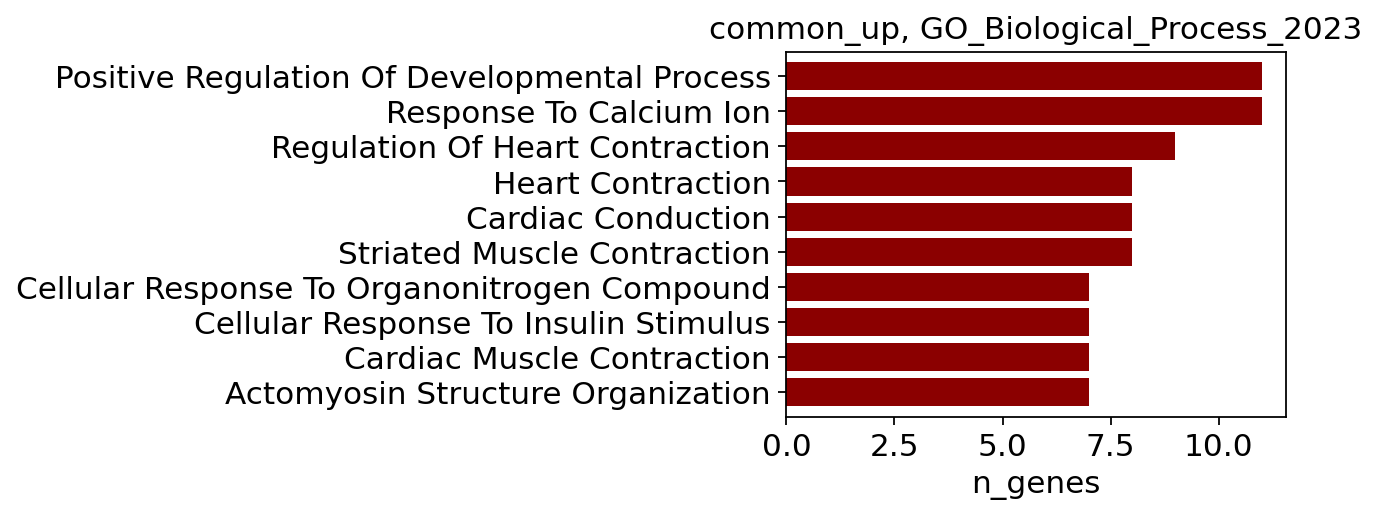

In [11]:
key = 'common_up'
adj_pval_thresh = 0.1
metrics = 'n_genes'
n_rank_plot = 10

enr = gp.enrichr(gene_list=gene_signatures[key],
                 gene_sets=geneset_list,
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )
enr.results['n_genes'] = [int(x.split('/')[0]) for x in enr.results['Overlap']]

for geneset in geneset_list:
    # select based on thresholds
    df = enr.results[enr.results['Gene_set'] == geneset]
    df = df[df['Adjusted P-value'] < adj_pval_thresh]
    if len(df)>0:
        print(geneset)
        df = df.sort_values(metrics,ascending=False)
        display(df[:30])
        
        # plot
        plt.rcParams['axes.grid'] = False
        plt.rcParams['figure.figsize'] = 4,3
        plt.barh(width=df[:n_rank_plot][metrics],
                 y=[x.split(' (')[0] for x in df[:n_rank_plot]['Term']],
                 color='darkred')
        plt.gca().invert_yaxis()
        plt.xlabel(metrics)
        plt.title(f'{key}, {geneset}')
        plt.margins(y=0.03)
        plt.savefig(f'{figdir}/Pathway-enr_vCM-left_{key}_{geneset}.pdf', bbox_inches="tight",dpi=300)
        plt.show()

MSigDB_Hallmark_2020


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,n_genes
0,MSigDB_Hallmark_2020,UV Response Dn,10/144,9.455637e-07,0.000032,0,0,8.392751,116.419910,COL3A1;COL1A2;PRKAR2B;PIK3R3;PTPRM;PRKCA;ATP2B...,10
1,MSigDB_Hallmark_2020,Epithelial Mesenchymal Transition,10/200,1.771981e-05,0.000301,0,0,5.902256,64.575559,FBN2;VCAN;COL3A1;COL1A2;IGFBP2;PMEPA1;VEGFC;SL...,10
3,MSigDB_Hallmark_2020,Mitotic Spindle,6/199,1.064380e-02,0.074060,0,0,3.407879,15.481237,DOCK4;STAU1;PALLD;RASAL2;KIFAP3;MID1,6
4,MSigDB_Hallmark_2020,TNF-alpha Signaling via NF-kB,6/200,1.089115e-02,0.074060,0,0,3.390140,15.322770,BTG1;TSC22D1;PMEPA1;INHBA;ATP2B1;IER3,6
2,MSigDB_Hallmark_2020,Notch Signaling,3/32,3.170589e-03,0.035933,0,0,11.246305,64.709418,MAML2;ST3GAL6;PRKCA,3


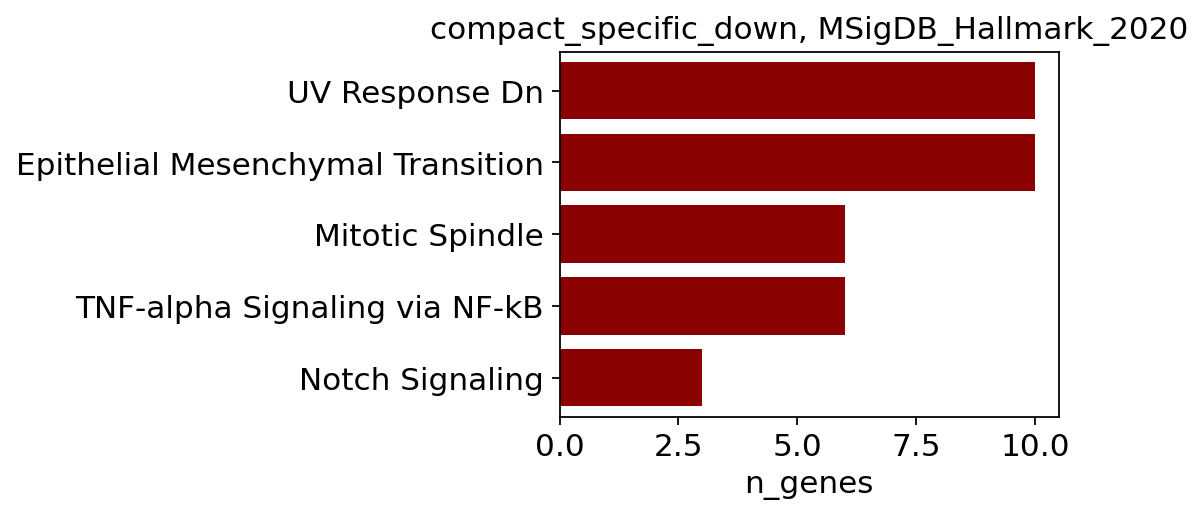

GO_Biological_Process_2023


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,n_genes
34,GO_Biological_Process_2023,Heart Development (GO:0007507),10/171,0.000004,0.005476,0,0,6.975688,85.915199,MYOCD;COL3A1;FLRT2;GJA5;UTY;ZFPM2;TBX5;HDAC9;M...,10
41,GO_Biological_Process_2023,Negative Regulation Of Multicellular Organisma...,9/231,0.000310,0.046013,0,0,4.513130,36.462960,MYOCD;NOVA1;LAMA4;PHF14;ATP2B1;TBX5;HDAC9;MARK...,9
36,GO_Biological_Process_2023,Axon Guidance (GO:0007411),8/149,0.000076,0.023543,0,0,6.306527,59.852475,EPHA7;SEMA3C;PALLD;SEMA3A;PLXNA2;PTPRM;NCAM1;S...,8
45,GO_Biological_Process_2023,Regulation Of Angiogenesis (GO:0045765),8/205,0.000660,0.063479,0,0,4.500961,32.958508,NPPB;BTG1;HMGA2;VEGFC;PTPRM;PRKCA;EMC10;PRKD1,8
43,GO_Biological_Process_2023,Actin Filament Organization (GO:0007015),7/144,0.000392,0.046013,0,0,5.648569,44.314256,CARMIL1;ACTA1;AVIL;GAS2;SHROOM3;PLS1;CNN3,7
40,GO_Biological_Process_2023,Transmembrane Receptor Protein Serine/Threonin...,7/130,0.000210,0.036659,0,0,6.295971,53.322082,DDX5;COL3A1;COL1A2;USP9Y;PDCD4;INHBA;BMP5,7
60,GO_Biological_Process_2023,Circulatory System Development (GO:0072359),6/132,0.001444,0.065402,0,0,5.237829,34.257604,COL3A1;GJA5;UTY;ZFPM2;TBX5;HDAC9,6
48,GO_Biological_Process_2023,Positive Regulation Of Angiogenesis (GO:0045766),6/119,0.000845,0.063479,0,0,5.844268,41.358386,BTG1;HMGA2;VEGFC;EMC10;PRKCA;PRKD1,6
44,GO_Biological_Process_2023,Positive Regulation Of Vasculature Development...,6/104,0.000414,0.046013,0,0,6.743929,52.535244,BTG1;HMGA2;VEGFC;EMC10;PRKCA;PRKD1,6
86,GO_Biological_Process_2023,Cytoskeleton Organization (GO:0007010),5/111,0.003731,0.083784,0,0,5.164832,28.877608,DIAPH3;PALLD;MAPKAP1;MARK1;SH3D19,5


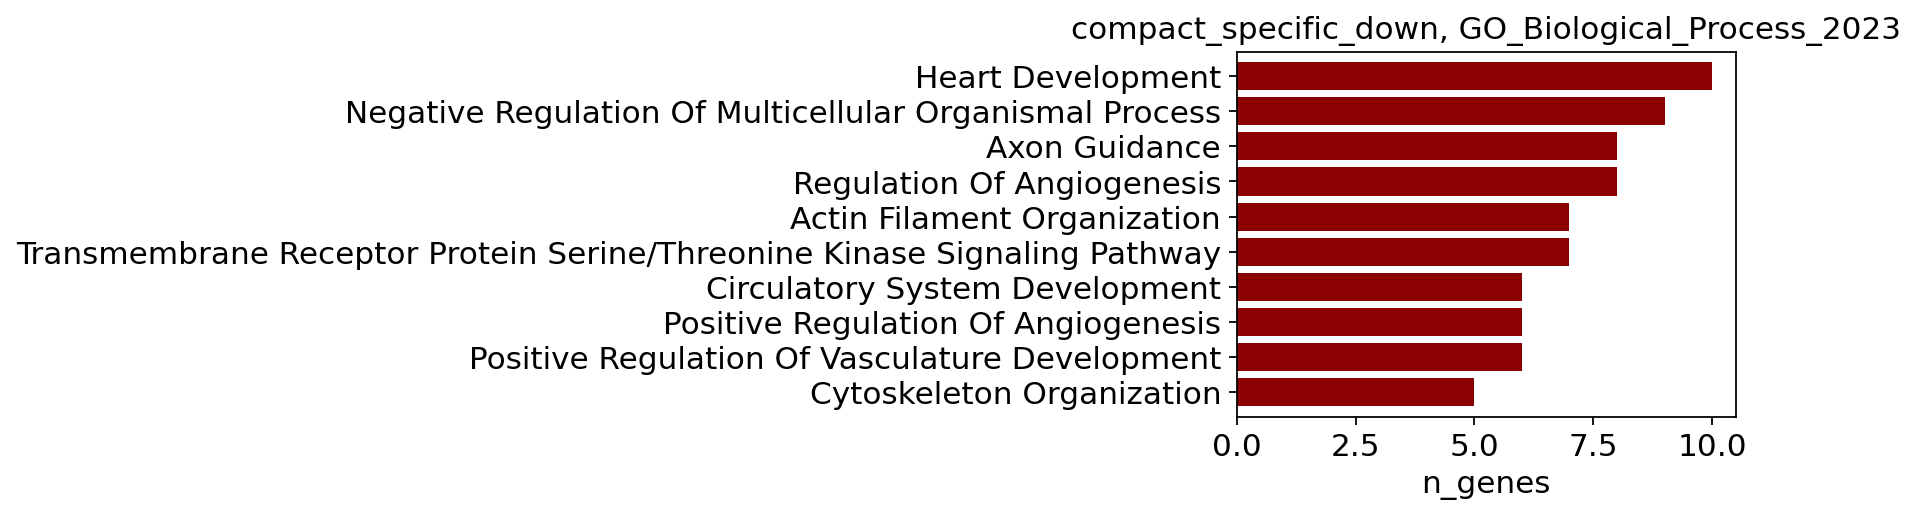

In [19]:
key = 'compact_specific_down'
adj_pval_thresh = 0.1
metrics = 'n_genes'
n_rank_plot = 10

enr = gp.enrichr(gene_list=gene_signatures[key],
                 gene_sets=geneset_list,
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )
enr.results['n_genes'] = [int(x.split('/')[0]) for x in enr.results['Overlap']]

for geneset in geneset_list:
    # select based on thresholds
    df = enr.results[enr.results['Gene_set'] == geneset]
    df = df[df['Adjusted P-value'] < adj_pval_thresh]
    if len(df)>0:
        print(geneset)
        df = df.sort_values(metrics,ascending=False)
        display(df[:30])
        
        # plot
        plt.rcParams['axes.grid'] = False
        plt.rcParams['figure.figsize'] = 4,3
        plt.barh(width=df[:n_rank_plot][metrics],
                 y=[x.split(' (')[0] for x in df[:n_rank_plot]['Term']],
                 color='darkred')
        plt.gca().invert_yaxis()
        plt.xlabel(metrics)
        plt.title(f'{key}, {geneset}')
        plt.margins(y=0.03)
        plt.show()

MSigDB_Hallmark_2020


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,n_genes
0,MSigDB_Hallmark_2020,Myc Targets V1,77/200,6.356220e-58,3.114548e-56,0,0,18.126059,2387.211103,YWHAE;EIF4A1;HNRNPU;PHB2;UBE2L3;PSMD8;PSMD7;SN...,77
1,MSigDB_Hallmark_2020,Oxidative Phosphorylation,55/200,1.118391e-32,2.740057e-31,0,0,10.616802,781.086969,ECI1;MRPL34;PHB2;TOMM22;TIMM17A;UQCRFS1;ACADM;...,55
2,MSigDB_Hallmark_2020,E2F Targets,32/200,2.430658e-12,3.970075e-11,0,0,5.151491,137.765588,JPT1;DNMT1;CDKN1B;PRKDC;HMGB3;SMC4;IPO7;PTTG1;...,32
3,MSigDB_Hallmark_2020,G2-M Checkpoint,30/200,6.225913e-11,7.626743e-10,0,0,4.758724,111.828658,JPT1;CDKN1B;ODC1;AMD1;HNRNPU;HMGB3;SMC4;SMC2;P...,30
4,MSigDB_Hallmark_2020,mTORC1 Signaling,26/200,2.524322e-08,2.473835e-07,0,0,4.005941,70.082767,BTG2;TOMM40;PSMD14;PLOD2;ACACA;HSP90B1;PSMB5;S...,26
5,MSigDB_Hallmark_2020,Adipogenesis,24/200,3.926262e-07,3.206447e-06,0,0,3.645149,53.767434,ECHS1;CAVIN1;GPX4;GADD45A;MDH2;MGST3;ITSN1;TAL...,24
10,MSigDB_Hallmark_2020,Mitotic Spindle,19/199,1.513033e-04,6.739873e-04,0,0,2.801406,24.641798,YWHAE;FARP1;DYNC1H1;ITSN1;SEPTIN9;SSH2;SMC1A;S...,19
9,MSigDB_Hallmark_2020,Fatty Acid Metabolism,18/158,2.238798e-05,1.097011e-04,0,0,3.414643,36.560534,FH;PDHA1;ECHS1;MDH1;MDH2;ECI1;ODC1;PDHB;ENO3;P...,18
13,MSigDB_Hallmark_2020,Epithelial Mesenchymal Transition,18/200,4.599152e-04,1.609703e-03,0,0,2.620879,20.140063,ITGB1;TAGLN;TNFRSF12A;TPM4;GADD45A;TPM2;TPM1;F...,18
17,MSigDB_Hallmark_2020,Glycolysis,17/200,1.236552e-03,3.366169e-03,0,0,2.458205,16.458739,CYB5A;MDH1;HSPA5;CITED2;MDH2;AGL;TALDO1;PLOD2;...,17


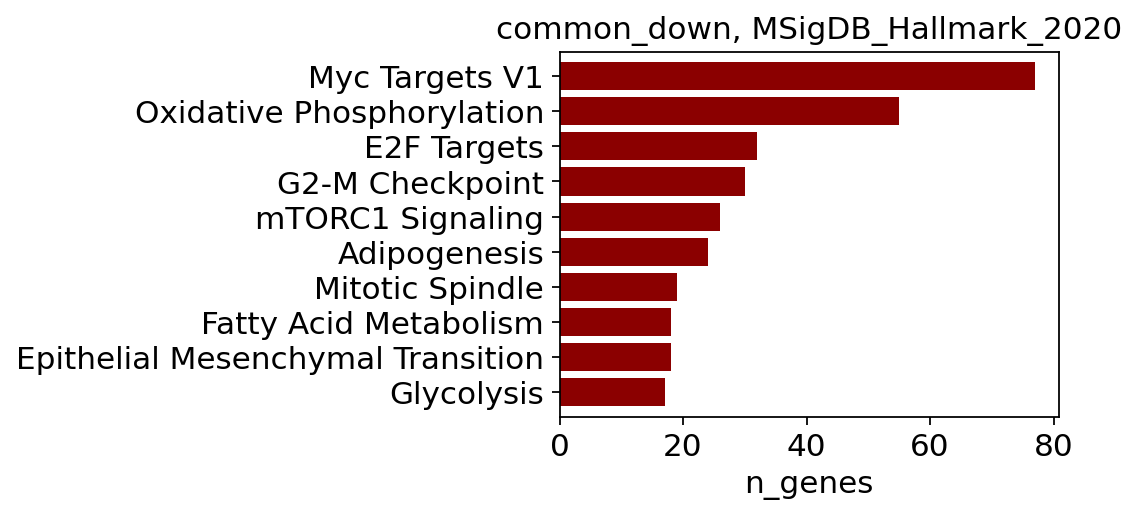

GO_Biological_Process_2023


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,n_genes
233,GO_Biological_Process_2023,Positive Regulation Of DNA-templated Transcrip...,65/1243,2.858379e-03,4.501482e-02,0,0,1.482680,8.684800,TCERG1;CITED2;CD81;HNRNPU;AKR1B1;NUCKS1;CHD4;P...,65
153,GO_Biological_Process_2023,Negative Regulation Of DNA-templated Transcrip...,59/1025,4.836385e-04,1.334370e-02,0,0,1.645740,12.563865,TCERG1;CDKN1B;TCF25;CITED2;HNRNPU;AKR1B1;CHD4;...,59
116,GO_Biological_Process_2023,Regulation Of Apoptotic Process (GO:0042981),47/705,7.076666e-05,3.048170e-03,0,0,1.923093,18.377311,ITGB1;VCP;RBM25;PRKDC;CITED2;GSTP1;PDCD5;PARK7...,47
171,GO_Biological_Process_2023,Regulation Of Cell Population Proliferation (G...,46/766,8.466678e-04,2.016171e-02,0,0,1.711890,12.110255,BEX4;COL18A1;BTG2;CDKN1B;CTBP2;PRKDC;CD81;PDCD...,46
105,GO_Biological_Process_2023,Positive Regulation Of Cellular Process (GO:00...,43/594,2.167412e-05,1.113745e-03,0,0,2.101015,22.563618,ANKRD17;CITED2;CD81;AKR1B1;ACTB;GNAI2;PRDX3;CD...,43
95,GO_Biological_Process_2023,Ubiquitin-Dependent Protein Catabolic Process ...,33/367,2.474878e-06,1.542323e-04,0,0,2.652669,34.244153,VCP;PSMD14;UBE2D2;NEDD8;FBXO21;RNF5;PSMA7;UBE2...,33
131,GO_Biological_Process_2023,Negative Regulation Of Nucleic Acid-Templated ...,33/456,1.936134e-04,6.832454e-03,0,0,2.084694,17.823397,EIF4A2;SET;CDKN1B;CTBP2;CITED2;CHD4;PTPRK;PHB2...,33
56,GO_Biological_Process_2023,mRNA Processing (GO:0006397),33/214,3.147555e-12,1.152399e-09,0,0,4.934548,130.688520,TCERG1;SF3B2;RBM8A;SF3B6;HNRNPU;HTATSF1;SNRPD2...,33
59,GO_Biological_Process_2023,"mRNA Splicing, Via Spliceosome (GO:0000398)",32/211,1.060583e-11,2.824043e-09,0,0,4.832133,122.106157,SF3B2;RBM8A;SF3B6;HNRNPU;HTATSF1;SNRPD2;PUF60;...,32
175,GO_Biological_Process_2023,Negative Regulation Of Apoptotic Process (GO:0...,32/482,1.050137e-03,2.373138e-02,0,0,1.894819,12.996251,ITGB1;SET;PRKDC;CITED2;GSTP1;PARK7;HIGD1A;PHB2...,32


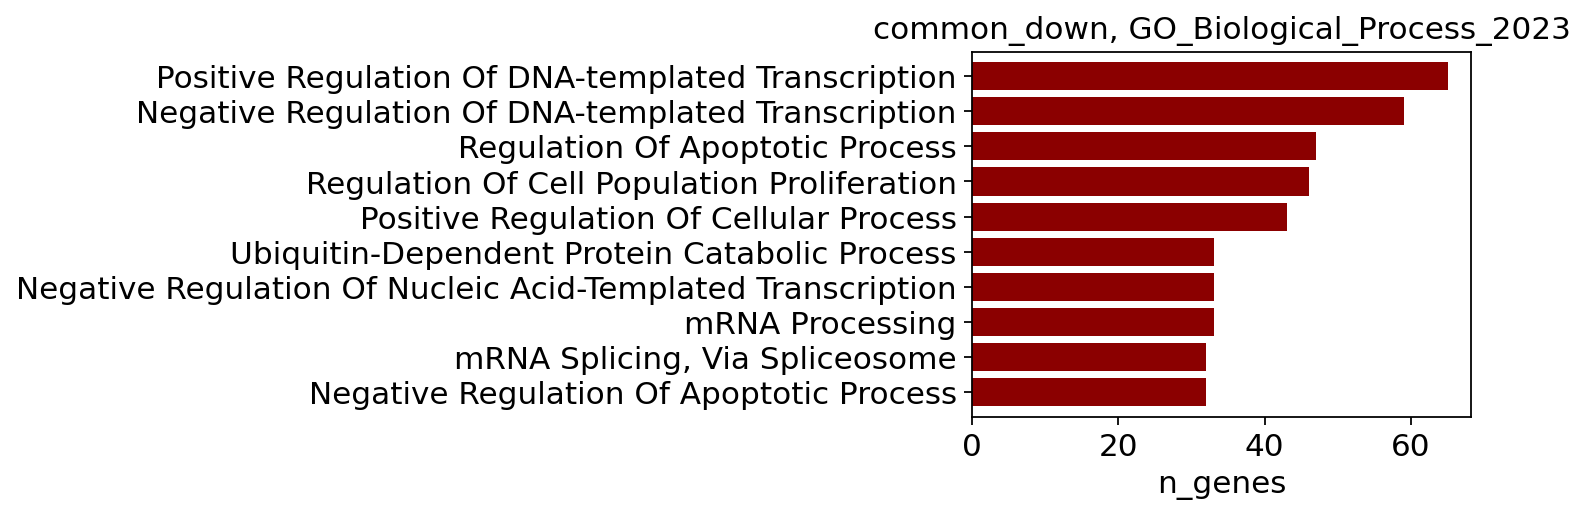

In [20]:
key = 'common_down'
adj_pval_thresh = 0.1
metrics = 'n_genes'
n_rank_plot = 10

enr = gp.enrichr(gene_list=gene_signatures[key],
                 gene_sets=geneset_list,
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )
enr.results['n_genes'] = [int(x.split('/')[0]) for x in enr.results['Overlap']]

for geneset in geneset_list:
    # select based on thresholds
    df = enr.results[enr.results['Gene_set'] == geneset]
    df = df[df['Adjusted P-value'] < adj_pval_thresh]
    if len(df)>0:
        print(geneset)
        df = df.sort_values(metrics,ascending=False)
        display(df[:30])
        
        # plot
        plt.rcParams['axes.grid'] = False
        plt.rcParams['figure.figsize'] = 4,3
        plt.barh(width=df[:n_rank_plot][metrics],
                 y=[x.split(' (')[0] for x in df[:n_rank_plot]['Term']],
                 color='darkred')
        plt.gca().invert_yaxis()
        plt.xlabel(metrics)
        plt.title(f'{key}, {geneset}')
        plt.margins(y=0.03)
        plt.show()